<h1 align=center><font size = 7><em>k</em>-means Countries Clustering</font></h1>

<h2 align=center><font size = 5> Demographics</font></h2>

<font size = 5> **Author**: Angelo Di Marco

## Introduction

In this Notebook, we apply the *k*-means clustering technique to group selected world countries according to their *demographic data*. The dataset has been build from the data available on [WorldOMeters](https://www.worldometers.info/) which refer to the year 2019.

By clustering the demographic dataset, we want to understand how the selected countries compare demographically with each other. The answer provides a more quantitative way to establish if a country belongs to a certain demographic group or another. This is of importance, for instance, to understand the dynamics of diffusion of a desease or virus like during the Covid-19 pandemy.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Countries Demographic Clustering: Europe</a>

    1.1 <a href="#item1.1">Data loading, pre-processing, normalization</a>
    
    1.2 <a href="#item1.2">Modeling - *k*-means clustering</a>
    
    1.3 <a href="#item1.3">Clusters visualization: Geographical Maps</a>
    
    1.4 <a href="#item1.4">Modeling - Sub-Clustering</a>
</font>
</div>

## Libraries

In [170]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

<a id='item1'></a>

## 1. Countries Demographic Clustering: Europe

In this section, we focus on some selected European countries.

<a id='item1.1'></a>

### 1.1 Data loading, pre-processing, normalization

### Loading Data

Let's load the data from the CSV file called **world-countries_demographics.csv** and read it into a *pandas* dataframe.

In [126]:
countries_df = pd.read_csv('world-countries_demographics.csv', sep=';', thousands=',')
countries_df.head(20)

,Country,Population,Urban Population,Surface,Density,Median Age,Life Expectancy,Fertility Rate
0,Italy,60550075,41887345,294140,206,45.7,84.01,1.40
1,Sweden,10036379,8817415,410340,24,40.9,83.33,1.89
2,Belgium,11539328,11336228,30280,381,41.5,82.17,1.77
3,France,65129728,52849078,547557,119,41.5,83.13,1.95
4,Germany,83517045,63787507,348560,240,45.9,81.88,1.46
5,Spain,46736776,37415111,498800,94,43.0,83.99,1.33
6,UK,67530172,56012276,241930,279,40.1,81.77,1.84
7,Norway,5378857,4462009,365268,15,39.3,82.94,1.79
8,Denmark,5771876,5081840,42430,136,41.7,81.40,1.74
9,Finland,5532156,4751986,303890,18,42.6,82.48,1.72


### Pre-processing

We check the type of the loaded data

In [127]:
countries_df.dtypes

Country              object
Population            int64
Urban Population      int64
Surface               int64
Density               int64
Median Age          float64
Life Expectancy     float64
Fertility Rate      float64
dtype: object

We change the type of the selected columns into *float*

In [128]:
countries_df[['Population','Urban Population','Surface','Density']] = countries_df[['Population','Urban Population','Surface','Density']].astype("float")

In [129]:
countries_df.dtypes

Country              object
Population          float64
Urban Population    float64
Surface             float64
Density             float64
Median Age          float64
Life Expectancy     float64
Fertility Rate      float64
dtype: object

We sort the DataFrame by *Population*

In [130]:
countries_df.sort_values(['Population'], ascending=False, inplace=True)

and we drop the *Surface* column

In [131]:
countries_df.drop(['Surface'], axis=1, inplace=True)
countries_df.head()

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33


### Normalization

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [132]:
X = countries_df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 2.13045719,  2.06041481,  0.58118725,  1.65884023, -1.1166475 ,
        -0.78233047],
       [ 1.53444393,  1.68802672,  0.87579394, -0.93711885, -1.2535068 ,
         0.91644427],
       [ 1.44495198,  1.53652804, -0.33284891, -0.31050804,  0.43857186,
         1.40819485],
       [ 1.27421604,  1.01152515,  0.32435064,  1.5693244 ,  1.53344629,
        -1.05055806],
       [ 0.7592367 ,  0.7973313 , -0.52169936,  0.36086069,  1.50856278,
        -1.36349025],
       [-0.34577125, -0.24073207,  2.59811   ,  0.04755528,  0.00311044,
         0.37998909],
       [-0.55297398, -0.45169465,  1.64630376, -0.31050804, -0.75583661,
         0.60351208],
       [-0.59271123, -0.57165019, -0.61990159,  0.71892401,  0.02799395,
        -1.31878565],
       [-0.60192973, -0.6716425 , -0.38572703,  0.94271359, -0.15863237,
        -1.58701325],
       [-0.60900604, -0.57233106, -1.0504806 , -0.57905553,  0.68740696,
         1.13996726],
       [-0.64931758, -0.74895707, -0.40838909,  0.

----------------

<a id='item1.2'></a>

### 1.2 Modeling - *k*-means clustering

### Which *k* ?

How many clusters should we group these colleges into? We can use the elbow method to decide. Plot the sum of squared distances of the data points from their cluster's center for increasing numbers of clusters and see if you can find a clear cluster number where the decrease in distortion starts to level off.

In [133]:
inertia = []
K = range(1,10)
for kkk in K:
    kmeanModel = KMeans(init="k-means++", n_clusters=kkk, n_init=100)
    kmeanModel.fit(cluster_dataset)
    inertia.append(kmeanModel.inertia_)

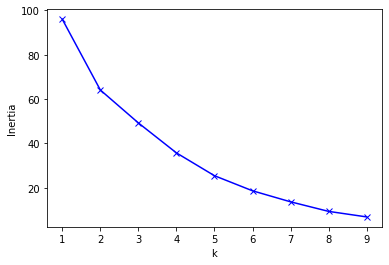

In [134]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that the number of clusters *k* should be 2, 4 or 5. In the following, we test all these possibilities.

------------

### Modeling --- *k* = 2

Let's run our model and group the countries into 2 clusters.

In [135]:
num_clusters = 2

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=100)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


<h3 id="insights">Insights</h3>

We can now assign a label to each country namely the cluster label provided by the clustering operation:

In [136]:
countries_df_k2 = countries_df.copy()
countries_df_k2["Labels"] = labels
countries_df_k2.sort_values(['Labels'], ascending=True)

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,0
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,0
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0
13,Austria,8955102.0,5129574.0,109.0,43.3,82.05,1.46,0
14,Switzerland,8591365.0,6357099.0,217.0,42.4,84.25,1.53,0
8,Denmark,5771876.0,5081840.0,136.0,41.7,81.40,1.74,0
9,Finland,5532156.0,4751986.0,18.0,42.6,82.48,1.72,0
7,Norway,5378857.0,4462009.0,15.0,39.3,82.94,1.79,0


We can easily check the centroid values by averaging the features in each cluster.

In [137]:
countries_df_k2.groupby('Labels').mean()

,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
Labels,,,,,,
0,8.953121e+06,7.302361e+06,151.909091,41.718182,82.696364,1.652727
1,6.469276e+07,5.039026e+07,187.600000,43.240000,82.956000,1.596000


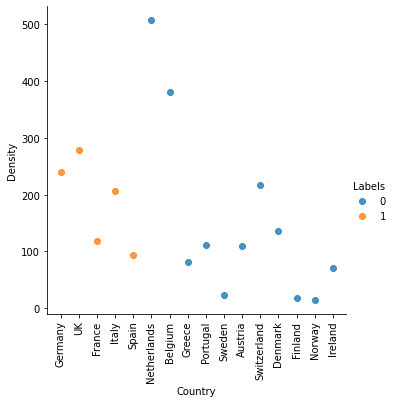

In [138]:
plot = sns.lmplot(x='Country',y='Density',data=countries_df_k2,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

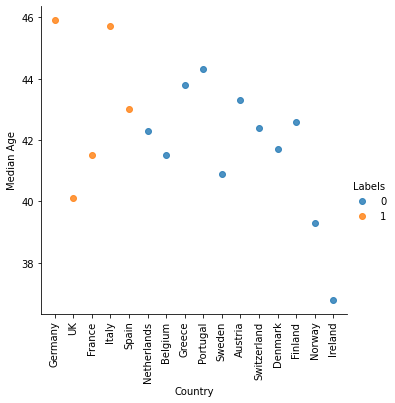

In [139]:
plot = sns.lmplot(x='Country',y='Median Age',data=countries_df_k2,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

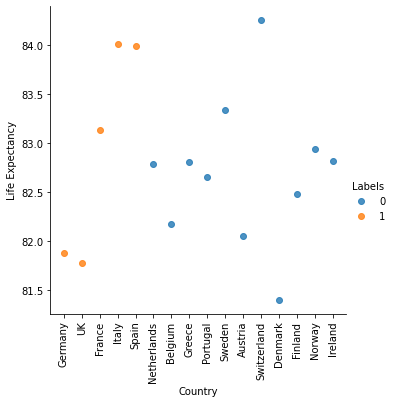

In [140]:
plot = sns.lmplot(x='Country',y='Life Expectancy',data=countries_df_k2,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

-------------------------------

### Modeling --- *k* = 3

Let's run our model and group the countries into 3 clusters.

In [141]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=100)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 2 2 1 1 2 2 1 1 2 1 1 1 1]


<h3 id="insights">Insights</h3>

We can now assign a label to each country namely the cluster label provided by the clustering operation:

In [142]:
countries_df_k3 = countries_df.copy()
countries_df_k3["Labels"] = labels
countries_df_k3.sort_values(['Labels'], ascending=True)

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,0
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,0
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,0
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,1
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,1
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,1
13,Austria,8955102.0,5129574.0,109.0,43.3,82.05,1.46,1
8,Denmark,5771876.0,5081840.0,136.0,41.7,81.40,1.74,1
9,Finland,5532156.0,4751986.0,18.0,42.6,82.48,1.72,1
7,Norway,5378857.0,4462009.0,15.0,39.3,82.94,1.79,1


We can easily check the centroid values by averaging the features in each cluster.

In [143]:
countries_df_k3.groupby('Labels').mean()

,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
Labels,,,,,,
0,7.205898e+07,5.754962e+07,212.666667,42.50,82.260,1.75000
1,8.649165e+06,7.299174e+06,157.625000,41.05,82.495,1.75375
2,2.731557e+07,2.024701e+07,142.000000,43.84,83.540,1.37600


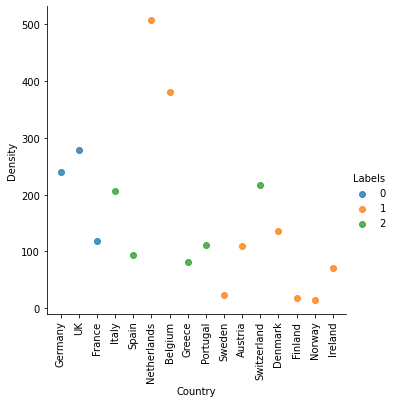

In [144]:
plot = sns.lmplot(x='Country',y='Density',data=countries_df_k3,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

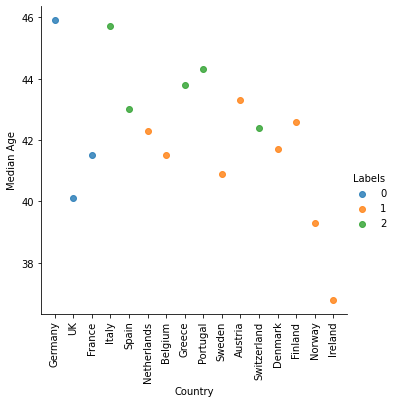

In [145]:
plot = sns.lmplot(x='Country',y='Median Age',data=countries_df_k3,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

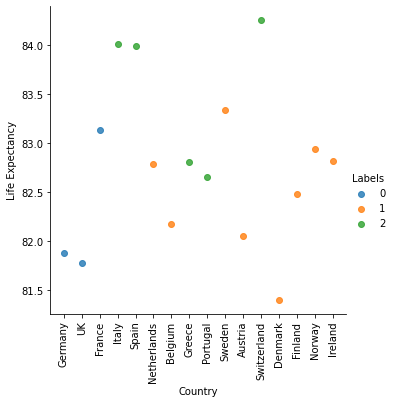

In [146]:
plot = sns.lmplot(x='Country',y='Life Expectancy',data=countries_df_k3,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

-------------------

### Modeling --- *k* = 4

Let's run our model and group the countries into 4 clusters.

In [147]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=100)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 2 2 1 1 3 3 1 1 0 1 1 0 0 0 0]


<h3 id="insights">Insights</h3>

We can now assign a label to each country namely the cluster label provided by the clustering operation:

In [148]:
countries_df_k4 = countries_df.copy()
countries_df_k4["Labels"] = labels
countries_df_k4.sort_values(['Labels'], ascending=True)

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0
8,Denmark,5771876.0,5081840.0,136.0,41.7,81.40,1.74,0
9,Finland,5532156.0,4751986.0,18.0,42.6,82.48,1.72,0
7,Norway,5378857.0,4462009.0,15.0,39.3,82.94,1.79,0
15,Ireland,4882495.0,3073341.0,71.0,36.8,82.81,1.94,0
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,1
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,1
13,Austria,8955102.0,5129574.0,109.0,43.3,82.05,1.46,1


We can easily check the centroid values by averaging the features in each cluster.

In [149]:
countries_df_k4.groupby('Labels').mean()

,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
Labels,,,,,,
0,6.320353e+06,5.237318e+06,52.800000,40.26,82.592000,1.816
1,2.425549e+07,1.772744e+07,136.500000,43.75,83.291667,1.390
2,7.205898e+07,5.754962e+07,212.666667,42.50,82.260000,1.750
3,1.431823e+07,1.353861e+07,444.000000,41.90,82.475000,1.745


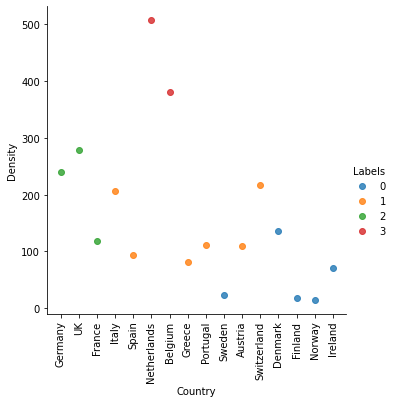

In [150]:
plot = sns.lmplot(x='Country',y='Density',data=countries_df_k4,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

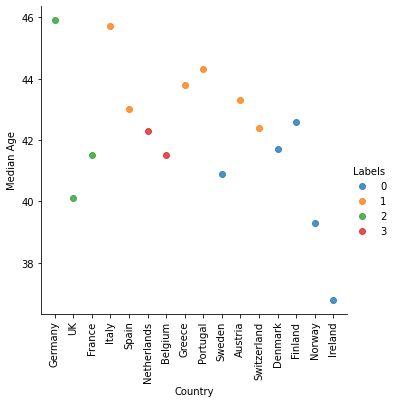

In [151]:
plot = sns.lmplot(x='Country',y='Median Age',data=countries_df_k4,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

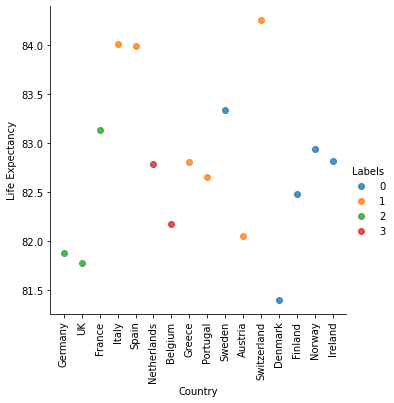

In [152]:
plot = sns.lmplot(x='Country',y='Life Expectancy',data=countries_df_k4,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

----------------

### Modeling --- *k* = 5

Let's run our model and group the countries into 5 clusters.

In [153]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=100)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 2 2 1 1 0 0 4 4 3 4 1 4 4 3 3]


<h3 id="insights">Insights</h3>

We can now assign a label to each country namely the cluster label provided by the clustering operation:

In [154]:
countries_df_k5 = countries_df.copy()
countries_df_k5["Labels"] = labels
countries_df_k5.sort_values(['Labels'], ascending=True)

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1
14,Switzerland,8591365.0,6357099.0,217.0,42.4,84.25,1.53,1
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,2
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,2
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,2
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,3
7,Norway,5378857.0,4462009.0,15.0,39.3,82.94,1.79,3


We can easily check the centroid values by averaging the features in each cluster.

In [155]:
countries_df_k5.groupby('Labels').mean()

,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
Labels,,,,,,
0,1.431823e+07,1.353861e+07,444.000000,41.90,82.475000,1.745000
1,3.862607e+07,2.855318e+07,172.333333,43.70,84.083333,1.420000
2,7.205898e+07,5.754962e+07,212.666667,42.50,82.260000,1.750000
3,6.765910e+06,5.450922e+06,36.666667,39.00,83.026667,1.873333
4,8.191755e+06,6.107777e+06,91.200000,43.14,82.276000,1.508000


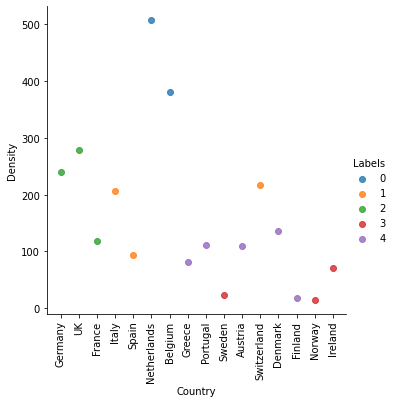

In [156]:
plot = sns.lmplot(x='Country',y='Density',data=countries_df_k5,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

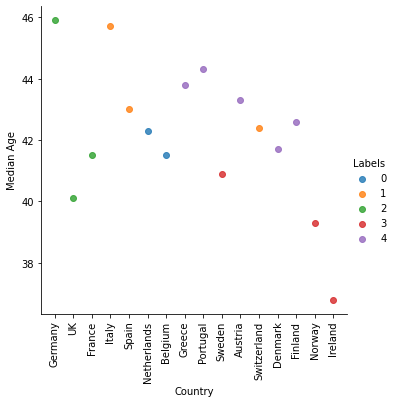

In [157]:
plot = sns.lmplot(x='Country',y='Median Age',data=countries_df_k5,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

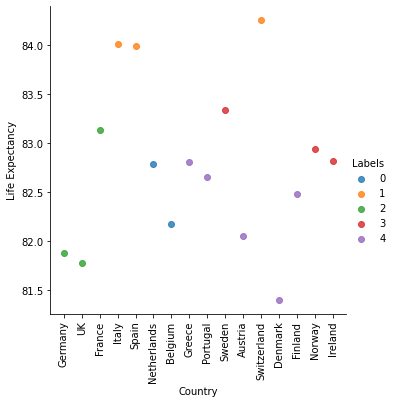

In [158]:
plot = sns.lmplot(x='Country',y='Life Expectancy',data=countries_df_k5,hue='Labels',fit_reg=False)
plot.set_xticklabels(rotation=90)

----------------------

<a id='item1.3'></a>

### 1.3 Clusters Visualization: Geographical Maps

In this section, we use the Folium Python package to visualize on a geographical map the clusters obtained in the previous section per each *k*-means model. To this end we use the geographical coordinates of world countries contained in the CSV file called **world-countries_coordinates.csv**.

### Map of the selected countries --- No clustering

Before showing the clusters on a geographical map per each *k*, we plot the map with the selected countries, European countries in this case, without grouping them into clusters.

First we load the geographical coordinates and include them in the initial dataframe

In [159]:
countries_coord = pd.read_csv('world-countries_coordinates.csv')
countries_coord.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [160]:
countries_coord.drop(['country'], axis=1, inplace=True)
countries_coord.rename(columns={"name": "Country"}, inplace=True)
countries_coord.head()

,latitude,longitude,Country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [161]:
countries_df_coord = pd.merge(countries_df, countries_coord, how='left', on=['Country'])
countries_df_coord

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,51.165691,10.451526
1,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,NaN,NaN
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,60.128161,18.643501


We see that we get a _NaN_ for UK. Most probably because the name of this country does not match the name in the coordinates dataframe. Let us then look for the word _United_ in the coordinates dataframe:

In [162]:
countries_coord_temp = countries_coord[countries_coord['Country'].str.contains("United")].reset_index(drop=True)
countries_coord_temp

,latitude,longitude,Country
0,23.424076,53.847818,United Arab Emirates
1,55.378051,-3.435973,United Kingdom
2,37.090240,-95.712891,United States


So, there are 3 states names containing the word _United_. One of them is _United Kingdom_. We replace then in the original dataframe _UK_ with _United Kingdom_.

In [163]:
countries_df

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89


In [164]:
countries_df.loc[6,'Country'] = 'United Kingdom'
countries_df

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46
6,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89


We repeat the merge operation and we get

In [165]:
countries_df_coord = pd.merge(countries_df, countries_coord, how='left', on=['Country'])
countries_df_coord

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,60.128161,18.643501


Then we use Nominatim to get latitude and longitude of Europe to center the map on Europe

In [166]:
address = 'Europe'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Europe are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Europe are 51.0, 10.0.


and finally we show the map with circle markers on each selected country

In [192]:
# create map of Toronto using latitude and longitude values
map_europe = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, country in zip(countries_df_coord['latitude'], countries_df_coord['longitude'], countries_df_coord['Country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

------------------

### Modeling --- *k* = 2

In [168]:
countries_df_k2

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,1
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,1
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,1
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,0
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,0
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0


In [169]:
countries_df_k2.loc[6,'Country'] = 'United Kingdom'
countries_df_coord_k2 = pd.merge(countries_df_k2, countries_coord, how='left', on=['Country'])
countries_df_coord_k2

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,1,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,1,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,1,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,0,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,0,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0,60.128161,18.643501


In [193]:
kclusters = 2

# create map
map_europe_clusters_k2 = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1.2, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, country, cluster in zip(countries_df_coord_k2['latitude'], countries_df_coord_k2['longitude'], countries_df_coord_k2['Country'], countries_df_coord_k2['Labels']):
    label = folium.Popup(str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
#         color=['red','orange','green','blue'],
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=['red','orange','green','blue'],
        fill_opacity=0.7).add_to(map_europe_clusters_k2)
       
map_europe_clusters_k2

-------------

### Modeling --- *k* = 3

In [172]:
countries_df_k3

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,0
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,0
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,0
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,2
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,2
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,1
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,1
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,2
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,2
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,1


In [173]:
countries_df_k3.loc[6,'Country'] = 'United Kingdom'
countries_df_coord_k3 = pd.merge(countries_df_k3, countries_coord, how='left', on=['Country'])
countries_df_coord_k3

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,0,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,0,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,0,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,2,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,2,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,1,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,1,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,2,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,2,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,1,60.128161,18.643501


In [194]:
kclusters = 3

# create map
map_europe_clusters_k3 = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1.2, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, country, cluster in zip(countries_df_coord_k3['latitude'], countries_df_coord_k3['longitude'], countries_df_coord_k3['Country'], countries_df_coord_k3['Labels']):
    label = folium.Popup(str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
#         color=['red','orange','green','blue'],
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=['red','orange','green','blue'],
        fill_opacity=0.7).add_to(map_europe_clusters_k3)
       
map_europe_clusters_k3

---------------

### Modeling --- *k* = 4

In [175]:
countries_df_k4

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,2
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,2
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,2
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,3
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,3
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,1
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,1
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0


In [176]:
countries_df_k4.loc[6,'Country'] = 'United Kingdom'
countries_df_coord_k4 = pd.merge(countries_df_k4, countries_coord, how='left', on=['Country'])
countries_df_coord_k4

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,2,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,2,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,2,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,3,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,3,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,1,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,1,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0,60.128161,18.643501


In [195]:
kclusters = 4

# create map
map_europe_clusters_k4 = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1.2, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, country, cluster in zip(countries_df_coord_k4['latitude'], countries_df_coord_k4['longitude'], countries_df_coord_k4['Country'], countries_df_coord_k4['Labels']):
    label = folium.Popup(str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
#         color=['red','orange','green','blue'],
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=['red','orange','green','blue'],
        fill_opacity=0.7).add_to(map_europe_clusters_k4)
       
map_europe_clusters_k4

------------------

### Modeling --- *k* = 5

In [178]:
countries_df_k5

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels
4,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,2
6,UK,67530172.0,56012276.0,279.0,40.1,81.77,1.84,2
3,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,2
0,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1
5,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1
12,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0
2,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0
11,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,4
10,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,4
1,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,3


In [179]:
countries_df_k5.loc[6,'Country'] = 'United Kingdom'
countries_df_coord_k5 = pd.merge(countries_df_k5, countries_coord, how='left', on=['Country'])
countries_df_coord_k5

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,2,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,2,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,2,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,4,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,4,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,3,60.128161,18.643501


In [191]:
kclusters = 5

# create map
map_europe_clusters_k5 = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, country, cluster in zip(countries_df_coord_k5['latitude'], countries_df_coord_k5['longitude'], countries_df_coord_k5['Country'], countries_df_coord_k5['Labels']):
    label = folium.Popup(str(country) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
#         color=['red','orange','green','blue'],
        fill=True,
        fill_color=rainbow[cluster-1],
#         fill_color=['red','orange','green','blue'],
        fill_opacity=0.7).add_to(map_europe_clusters_k5)
       
map_europe_clusters_k5

----------------

<a id='item1.4'></a>

### 1.4 Modeling - Sub-Clustering

So far we clusterized the selected countries by comparing all of them together. As the elbow method analysis shows, going from 1 to 2 clusters is more "significant" than moving from 2 to 3, from 3 to 4, or from 4 to 5 clusters. It is more resonable then to first group the selected countries into 2 clusters and then clusterize each cluster separately into sub-clusters. This is what we want to do in this section.

### Two Main Clusters

The two main clusters we consider are reported in the table and geographical map below:

In [196]:
countries_df_coord_k2

,Country,Population,Urban Population,Density,Median Age,Life Expectancy,Fertility Rate,Labels,latitude,longitude
0,Germany,83517045.0,63787507.0,240.0,45.9,81.88,1.46,1,51.165691,10.451526
1,United Kingdom,67530172.0,56012276.0,279.0,40.1,81.77,1.84,1,55.378051,-3.435973
2,France,65129728.0,52849078.0,119.0,41.5,83.13,1.95,1,46.227638,2.213749
3,Italy,60550075.0,41887345.0,206.0,45.7,84.01,1.40,1,41.871940,12.567380
4,Spain,46736776.0,37415111.0,94.0,43.0,83.99,1.33,1,40.463667,-3.749220
5,Netherlands,17097130.0,15740995.0,507.0,42.3,82.78,1.72,0,52.132633,5.291266
6,Belgium,11539328.0,11336228.0,381.0,41.5,82.17,1.77,0,50.503887,4.469936
7,Greece,10473455.0,8831631.0,81.0,43.8,82.80,1.34,0,39.074208,21.824312
8,Portugal,10226187.0,6743854.0,112.0,44.3,82.65,1.28,0,39.399872,-8.224454
9,Sweden,10036379.0,8817415.0,24.0,40.9,83.33,1.89,0,60.128161,18.643501


In [197]:
map_europe_clusters_k2